In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score

%matplotlib inline

In [64]:
def load_csv(csv_file):
    df = pd.read_csv(csv_file, header=4)

    for col in df.columns:
        if col != "City":
            try:
                df[col] = df[col].str.replace(',', '')
            except:
                pass

    for col in df.columns:
        try:
            df[col] = pd.to_numeric(df[col])
        except:
            pass
        
    return df

In [39]:
def prep_df(df):
    df['murder_bin'] = [1 if ik>0 else 0 for ik in df['murder_etc']]
    df['robbery_bin'] = [1 if ik>0 else 0 for ik in df['robbery']]
    df['pop_sq'] = [ik**2 for ik in df['population']] 
    return df[df.population<120000]

In [68]:
ny_file = 'NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013 - 13tbl8ny.csv'
ny_df = load_csv(ny_file)

ny_df.columns = ['city', 'population', 'violent_crime', 'murder_etc', 'rape', 'rape2', 'robbery', 'aggrevated_assault','property_crime', 'burglary', 'larceny_theft', 'vehicle_theft', 'arson3']

ny_df2 = prep_df(ny_df)

In [69]:
crime_cols2 = [ 'pop_sq', 'burglary','robbery_bin','murder_etc','murder_bin',
        'aggrevated_assault', 'arson3', 'property_crime']

In [70]:
scaler = preprocessing.StandardScaler().fit(ny_df2[crime_cols2])

ny_df_scaled = ny_df2[crime_cols2]
ny_df_scaled[crime_cols2] = scaler.fit_transform(ny_df_scaled)

/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing t

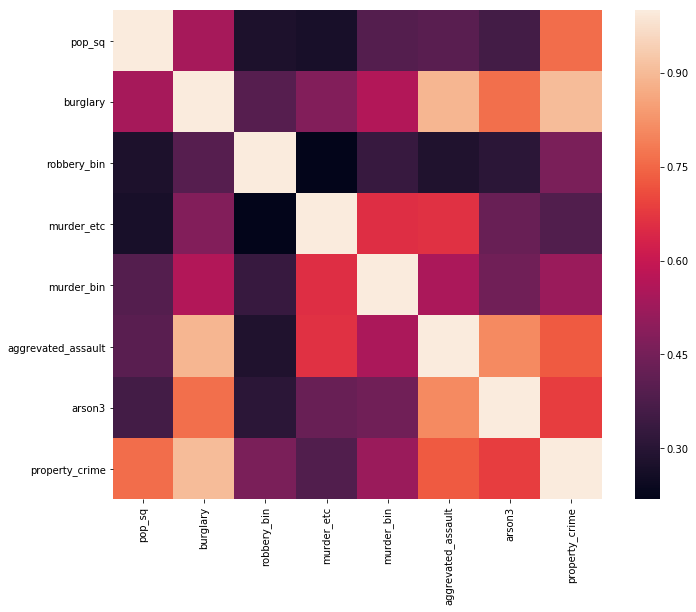

In [71]:
corrmat = ny_df2[crime_cols2].dropna().corr()
fig, ax = plt.subplots(1,1, figsize = (12,9))
sns.heatmap(corrmat, vmax = 1, square = True)

In [72]:
target = 'property_crime'
crime_cols2.remove(target)

In [73]:
print('scaled data')
ny_df_sub = ny_df_scaled[crime_cols2+[target]].dropna()
X_train, X_test, y_train, y_test = train_test_split(ny_df_sub[crime_cols2], ny_df_sub[target], test_size=0.20, random_state=42)
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
print('score:', regr.score(X_test, y_test))
    
for ik in range(len(crime_cols2)):
    temp = crime_cols2.pop(0)
    ny_df_sub = ny_df_scaled[crime_cols2+[target]].dropna()
    X_train, X_test, y_train, y_test = train_test_split(ny_df_sub[crime_cols2], ny_df_sub[target], test_size=0.20, random_state=42)
    regr = linear_model.LinearRegression()
    regr.fit(X_train, y_train)
    print('\nword: ', temp, '\nscore:', regr.score(X_test, y_test))
    crime_cols2.append(temp)
# print('coefficients: ', regr.coef_, '\nintercept:', regr.intercept_ )

scaled data
score: 0.94203871937

word:  pop_sq 
score: 0.818285661044

word:  burglary 
score: 0.77609714768

word:  robbery_bin 
score: 0.944632527718

word:  murder_etc 
score: 0.939314002469

word:  murder_bin 
score: 0.938563839685

word:  aggrevated_assault 
score: 0.912405324264

word:  arson3 
score: 0.911029219064


In [74]:
print('unscaled')
for ik in range(len(crime_cols2)):
    temp = crime_cols2.pop(0)
    ny_df_sub = ny_df2[crime_cols2+[target]].dropna()
    X_train, X_test, y_train, y_test = train_test_split(ny_df_sub[crime_cols2], ny_df_sub[target], test_size=0.20, random_state=42)
    regr = linear_model.LinearRegression()
    regr.fit(X_train, y_train)
    print('\nword: ', temp, '\nscore:', regr.score(X_test, y_test))
    crime_cols2.append(temp)
    
print('\nfull feature set')
ny_df_sub = ny_df2[crime_cols2+[target]].dropna()
X_train, X_test, y_train, y_test = train_test_split(ny_df_sub[crime_cols2], ny_df_sub[target], test_size=0.20, random_state=42)
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
print(cross_val_score(regr, X_train, y_train,  cv=6))
print('score:', regr.score(X_test, y_test))

unscaled

word:  pop_sq 
score: 0.818285661044

word:  burglary 
score: 0.776097123612

word:  robbery_bin 
score: 0.944632531028

word:  murder_etc 
score: 0.939314000515

word:  murder_bin 
score: 0.938563839774

word:  aggrevated_assault 
score: 0.912405324264

word:  arson3 
score: 0.911029219064

full feature set
[ 0.98012343  0.74214661  0.82808003  0.76335264  0.96362644  0.79532382]
score: 0.94203871937


In [75]:
regr = linear_model.LinearRegression()
regr.fit(ny_df_sub[crime_cols2], ny_df_sub[target])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [32]:
ca_file = 'table_8_offenses_known_to_law_enforcement_california_by_city_2013.csv'

In [33]:
ca_df = load_csv(ny_file)

In [37]:
ca_df.columns = ['city', 'population', 'violent_crime', 'murder_etc', 'rape', 'rape2', 'robbery', 'aggrevated_assault','property_crime', 'burglary', 'larceny_theft', 'vehicle_theft', 'arson3']

In [40]:
ca_df2 = prep_df(ca_df)
ca_df_sub = ca_df2[crime_cols2+[target]].dropna()

In [62]:
print(regr.score(ca_df_sub[crime_cols2], ca_df_sub[target]))

print(cross_val_score(regr, ca_df_sub[crime_cols2], ca_df_sub[target],  cv=10))

0.942407926988
[ 0.53476256  0.90284133  0.82371121  0.93905558  0.61021561  0.86798772
  0.92618682  0.79586087  0.81313083  0.84861009]


In the previous exercise I used the holdout method to cull the feature set to optimize  r^2 score and I split the data into a training set and a testing set to get a better idea of how my model would perform on data it hadn't seen during training.  In this notebook, I addded cross validation and found that at this data set size, model performance varies some depending on what split is being being used for testing and training. 

That said, the model trained on the entire NY dataset performed similarly on the CA data, with a score of .942.